print of y


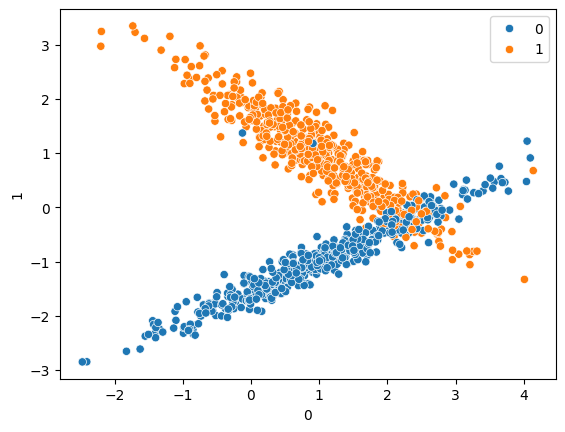

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       120
           1       1.00      0.87      0.93       130

    accuracy                           0.93       250
   macro avg       0.94      0.93      0.93       250
weighted avg       0.94      0.93      0.93       250

[[120   0]
 [ 17 113]]


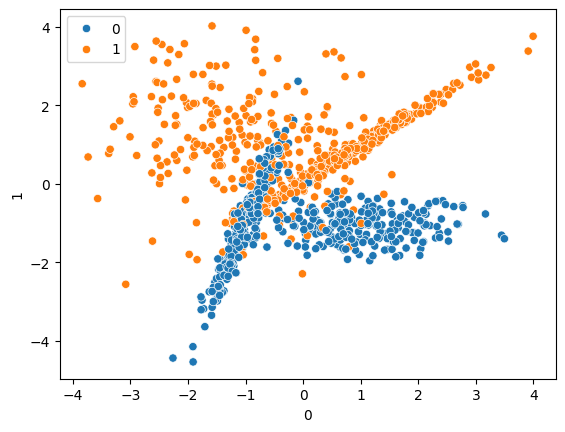

RBF:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       120
           1       1.00      0.88      0.93       130

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

Poly:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       120
           1       0.99      0.88      0.93       130

    accuracy                           0.93       250
   macro avg       0.94      0.93      0.93       250
weighted avg       0.94      0.93      0.93       250

Sigmoid:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       120
           1       0.96      0.86      0.91       130

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       2

In [ ]:
# 🧰 1. Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# •	These are basic libraries used for:
# o	pandas & numpy – handling data
# o	seaborn & matplotlib – plotting and visualization

# 📊 2. Create Synthetic Dataset
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_classes=2,
    n_clusters_per_class=1,
    n_redundant=0,
    random_state=42
)
# •	make_classification generates fake (but realistic) classification data.
# •	n_features=2 → good for visualizing 2D.
# •	n_clusters_per_class=1 makes points cleaner and easier to separate.
print("print of X")
X
# array([[ 0.60103418,  1.5353525 ]])
print("print of y")
y
#array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0])

# 🖼️ 3. Visualize the Data

df = pd.DataFrame(X)
sns.scatterplot(x=df[0], y=df[1], hue=y)
plt.show()
# •	Converts X into a DataFrame for easy access to columns.
# •	Uses scatterplot to visualize class separation.
# •	hue=y colors the points by their class (0 or 1).

# 🧪 4. Split Data into Train & Test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=10
)
# •	Splits the data: 75% for training, 25% for testing.
# •	random_state ensures reproducible results.

# 🤖 5. Train SVM with Linear Kernel

from sklearn.svm import SVC

svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train, y_train)
# •	Using linear SVM because data is clearly separable.
# •	.fit() trains the model using the training data.

#Output : SVC(kernel='linear')

# 📈 6. Predict & Evaluate Accuracy
from sklearn.metrics import classification_report, confusion_matrix

y_pred = svc_linear.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# •	classification_report shows precision, recall, and F1-score.
# •	confusion_matrix shows how many samples were correctly/incorrectly classified.
# •	Expected: High accuracy because of linearly separable data.

# precision    recall  f1-score   support

#            0       0.88      1.00      0.93       120
#            1       1.00      0.87      0.93       130

#     accuracy                           0.93       250
#    macro avg       0.94      0.93      0.93       250
# weighted avg       0.94      0.93      0.93       250

# [[120   0]
#  [ 17 113]]

# 🔁 7. Try Overlapping Data

X2, y2 = make_classification(
    n_samples=1000,
    n_features=2,
    n_classes=2,
    n_clusters_per_class=2,
    n_redundant=0,
    random_state=42
)

df2 = pd.DataFrame(X2)
sns.scatterplot(x=df2[0], y=df2[1], hue=y2)
plt.show()
# •	More complex data with overlapping clusters (n_clusters_per_class=2).
# •	Linear SVM won't perform well → lower accuracy.

#Output
# precision    recall  f1-score   support

#            0       0.88      1.00      0.93       120
#            1       1.00      0.87      0.93       130

#     accuracy                           0.93       250
#    macro avg       0.94      0.93      0.93       250
# weighted avg       0.94      0.93      0.93       250

# [[120   0]
#  [ 17 113]]

# 🔧 8. Try Different Kernels

# 🔸 RBF (Radial Basis Function)
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train, y_train)
y_pred_rbf = svc_rbf.predict(X_test)
# •	Good for non-linear patterns.
# •	Often gives better accuracy when data isn't clearly separable.
# 🔸 Polynomial
svc_poly = SVC(kernel='poly')
svc_poly.fit(X_train, y_train)
y_pred_poly = svc_poly.predict(X_test)
# 🔸 Sigmoid
svc_sigmoid = SVC(kernel='sigmoid')
svc_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = svc_sigmoid.predict(X_test)
# 🔹 Evaluate all
print("RBF:\n", classification_report(y_test, y_pred_rbf))
print("Poly:\n", classification_report(y_test, y_pred_poly))
print("Sigmoid:\n", classification_report(y_test, y_pred_sigmoid))
# •	RBF usually performs best on complex data.
# •	Other kernels may perform worse depending on the shape of the data.

#output
# RBF:
#                precision    recall  f1-score   support

#            0       0.88      1.00      0.94       120
#            1       1.00      0.88      0.93       130

#     accuracy                           0.94       250
#    macro avg       0.94      0.94      0.94       250
# weighted avg       0.94      0.94      0.94       250

# Poly:
#                precision    recall  f1-score   support

#            0       0.88      0.99      0.93       120
#            1       0.99      0.88      0.93       130

#     accuracy                           0.93       250
#    macro avg       0.94      0.93      0.93       250
# weighted avg       0.94      0.93      0.93       250

# Sigmoid:
#                precision    recall  f1-score   support

#            0       0.86      0.96      0.91       120
#            1       0.96      0.86      0.91       130

#     accuracy                           0.91       250
#    macro avg       0.91      0.91      0.91       250
# weighted avg       0.91      0.91      0.91       250

# ⚙️ 9. Hyperparameter Tuning using GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [1, 10, 100, 1000],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5, verbose=3)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
# •	GridSearchCV tries many combinations of parameters to find the best ones.
# •	C controls margin size, gamma controls the shape of the decision boundary.
# •	cv=5 means 5-fold cross-validation.

# ✅ 10. Predict Using Best Model from GridSearch
y_pred_best = grid.predict(X_test)
print(classification_report(y_test, y_pred_best))
# •	This gives the final prediction using the best-tuned model.
# •	Usually leads to higher accuracy (e.g., from 88% → 93%).
# 🔍 11. Extra: View Coefficients (Only for Linear)
print("Coefficients:", svc_linear.coef_)
print("Intercept:", svc_linear.intercept_)
# •	Only available for linear kernel (not RBF, sigmoid, etc.).
# •	Shows the weight of each feature in decision-making.

#Output
# Coefficients: [[-0.82515332  2.26625757]]
# Intercept: [1.59379507]